In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 🧪 Generate synthetic dataset
X, y = make_regression(n_samples=200, n_features=10, noise=20, random_state=42)

In [3]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 📏 Feature Scaling (important for Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# ⚙️ Train Lasso Regression Model
lasso = Lasso(alpha=0.1)  # Try alpha = 0.01, 0.1, 1.0 etc.
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [6]:
# 📈 Predict on Test Set
y_pred = lasso.predict(X_test_scaled)

In [7]:
# 🧮 Evaluation Metrics
print("🔍 Lasso Regression Results:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficients: {lasso.coef_}")
print(f"Number of features selected (non-zero): {np.sum(lasso.coef_ != 0)}")

🔍 Lasso Regression Results:
R² Score: 0.9884
MSE: 402.90
Coefficients: [32.84583882 35.50067308  8.27436535 93.03793818  9.68307542 85.57450006
 35.18920708 74.34637037 45.04202636  8.88116965]
Number of features selected (non-zero): 10


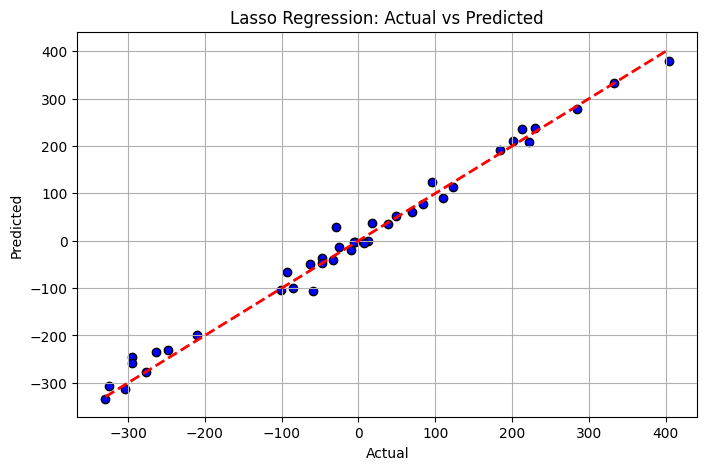

In [8]:
# 📊 Plot Predictions vs Actual
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, c='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Lasso Regression: Actual vs Predicted")
plt.grid(True)
plt.show()